In [1]:
HOME_DIR = 'C:/SED/keras-yolo3'
import sys, os
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

%matplotlib inline 

# github을 다운로드한 메인 디렉토리를 sys.path로 잡아준다.
LOCAL_DIR = os.path.abspath(HOME_DIR) #HOME_DIR 을 abspath 사용해서 절대경로로 잡아줌.
sys.path.append(LOCAL_DIR)
#sys.path : 모듈을 import 할 때 모듈을 찾아야할 경로들을 저장해둔 list(파이썬 라이브러리들이 저장되어 있는 위치)
#yolo3.model을 사용할 수 있게 경로 지정. (append는 경로 추가.)


In [2]:
#ninth_test

LOCAL_DIR = os.path.abspath(HOME_DIR)
#os.path.abspath : 파이썬 파일의 절대경로.

WEIGHT_DIR=os.path.abspath(LOCAL_DIR+'/ninth_test/trained_weights_final.h5')
#학습해서 다운 받은 .h 파일
#.h5 파일은 keras 에서 할 때 모델과 가중치를 모두 넣어준 파일이다.
ANCHOR_DIR=os.path.abspath(LOCAL_DIR+'/yolo_anchors.txt')
CLASS_DIR=os.path.abspath(LOCAL_DIR+'/hardhatvest_classes.txt')

In [3]:
from yolo import YOLO
from PIL import Image
import argparse
sys.path.append(LOCAL_DIR)
from tensorflow.python.framework.ops import disable_eager_execution
# import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

print(tf.__version__)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2.6.0


In [4]:
helmetvest = YOLO(model_path=WEIGHT_DIR,
            anchors_path=ANCHOR_DIR,
            classes_path=CLASS_DIR)

Instructions for updating:
Colocations handled automatically by placer.
C:\SED\keras-yolo3\ninth_test\trained_weights_final.h5 model, anchors, and classes loaded.


In [5]:
Image_Dir ='C:/SED/keras-yolo3/traindata'
files = os.listdir(Image_Dir)
print(len(files))

26


In [6]:
import matplotlib
import matplotlib.pyplot as plt


test_img = 'C:/SED/keras-yolo3/traindata/'
img = Image.open(os.path.join(test_img, 'hardhatvest8.jpg'))

#plt.figure(figsize=(5, 5))
#plt.imshow(img)

(416, 416, 3)
Found 2 boxes for img
vest 1.00 (79, 200) (276, 413)
{'vest': [[(79, 200), (276, 413)]]}
helmet 0.99 (132, 19) (229, 189)
{'vest': [[(79, 200), (276, 413)]], 'helmet': [[(132, 19), (229, 189)]]}
3.377703099999998


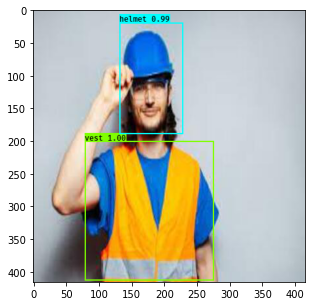

In [7]:
detected_img, label_dict = helmetvest.detect_image(img)
#tuple


plt.figure(figsize=(5,5))
plt.imshow(detected_img)
# print(end - start) 걸린 시간.

['C:/SED/keras-yolo3/traindata\\gegrdb.jpg'
 'C:/SED/keras-yolo3/traindata\\hardhatvest17.jpg'
 'C:/SED/keras-yolo3/traindata\\hardhatvest18.jpg'
 'C:/SED/keras-yolo3/traindata\\hardhatvest04.jpg']
(416, 416, 3)
Found 2 boxes for img
vest 1.00 (49, 145) (346, 408)
{'vest': [[(49, 145), (346, 408)]]}
helmet 1.00 (85, 9) (248, 146)
{'vest': [[(49, 145), (346, 408)]], 'helmet': [[(85, 9), (248, 146)]]}
0.5476199000000008
(416, 416, 3)
Found 2 boxes for img
vest 1.00 (3, 177) (356, 407)
{'vest': [[(3, 177), (356, 407)]]}
helmet 1.00 (129, 30) (308, 173)
{'vest': [[(3, 177), (356, 407)]], 'helmet': [[(129, 30), (308, 173)]]}
0.5224271999999957
(416, 416, 3)
Found 2 boxes for img
vest 1.00 (29, 115) (394, 388)
{'vest': [[(29, 115), (394, 388)]]}
helmet 0.98 (144, 14) (281, 120)
{'vest': [[(29, 115), (394, 388)]], 'helmet': [[(144, 14), (281, 120)]]}
0.631385899999998
(416, 416, 3)
Found 2 boxes for img
vest 0.84 (134, 102) (223, 367)
{'vest': [[(134, 102), (223, 367)]]}
non_helmet 0.99 (159,

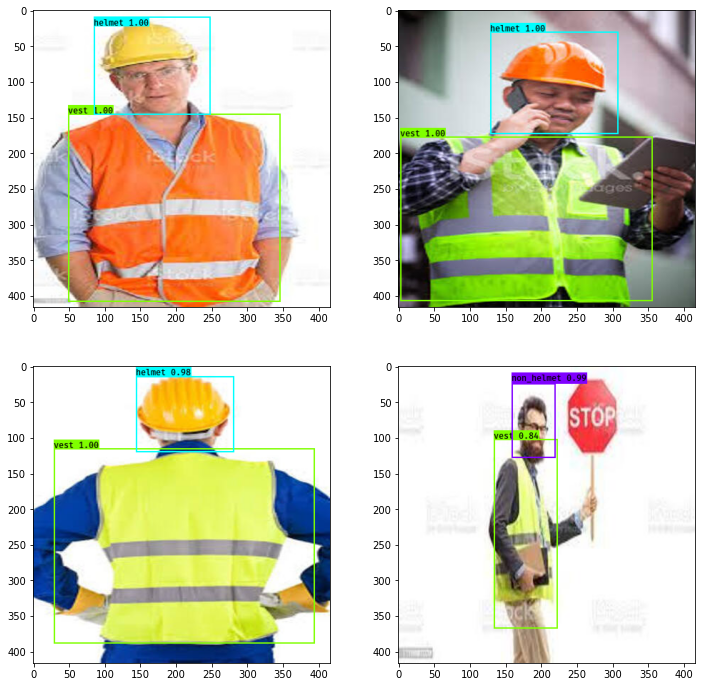

In [8]:
import glob
np.random.seed(5)

# 랜덤하게 4개의 이미지 파일만 선택.
# 랜덤 숫자 만을 이용하지 말고 아래와 같은 방법을 이용하면, 알아서 random하게 파일을 선택해준다. 
all_images = glob.glob(Image_Dir + '/*.jpg')
all_images = np.array(all_images)
file_cnt = all_images.shape[0]
show_cnt = 4
show_indexes = np.random.choice(file_cnt, show_cnt)
show_files = all_images[show_indexes]
print(show_files)

# 8개의 
fig, axs = plt.subplots(figsize=(12,12) , ncols=2 , nrows=2)
for i , filename in enumerate(show_files):
    row = int(i/2)
    col = i%2
    img = Image.open(os.path.join(Image_Dir, filename))
    detected_img, label_dict = helmetvest.detect_image(img)
    axs[row][col].imshow(detected_img)

In [10]:
# test 에 있는 이미지들로 테스트. (즉 train한 이미지가 아닌 다른 이미지) 

In [152]:
import matplotlib
import matplotlib.pyplot as plt


test_img2 = 'C:/SED/keras-yolo3/testdata'
img2 = Image.open(os.path.join(test_img2, 'helmetvest.jpg'))

#plt.figure(figsize=(5, 5))
#plt.imshow(img)

(416, 416, 3)
Found 2 boxes for img
vest 0.98 (72, 231) (405, 416)
{'vest': [[(72, 231), (405, 416)]]}
helmet 0.99 (132, 0) (306, 212)
{'vest': [[(72, 231), (405, 416)]], 'helmet': [[(132, 0), (306, 212)]]}
0.5969465999987733


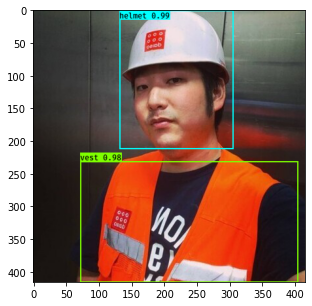

In [153]:
detected_img, label_dict = helmetvest.detect_image(img2)
#tuple


plt.figure(figsize=(5,5))
plt.imshow(detected_img)

['C:/SED/keras-yolo3/testdata\\front_crawling_00844_jpg.rf.bdf0d1539b993f687a806e11e1f9ba2e.jpg'
 'C:/SED/keras-yolo3/testdata\\front_crawling_00837_jpg.rf.335ff096989959ca0264804a188d3fd7.jpg'
 'C:/SED/keras-yolo3/testdata\\front_crawling_00814_jpg.rf.c0cd301ca07b94a3dbda35937ccee8b5.jpg'
 'C:/SED/keras-yolo3/testdata\\front_crawling_00818_jpg.rf.6b26b39b4b399e7328bd93531aefd948.jpg']
(416, 416, 3)
Found 2 boxes for img
non_vest 0.99 (89, 220) (312, 394)
{'non_vest': [[(89, 220), (312, 394)]]}
helmet 0.98 (146, 15) (308, 223)
{'non_vest': [[(89, 220), (312, 394)]], 'helmet': [[(146, 15), (308, 223)]]}
0.5666536999997334
(416, 416, 3)
Found 2 boxes for img
non_vest 0.99 (95, 164) (264, 401)
{'non_vest': [[(95, 164), (264, 401)]]}
helmet 0.97 (151, 28) (271, 143)
{'non_vest': [[(95, 164), (264, 401)]], 'helmet': [[(151, 28), (271, 143)]]}
0.4893231999994896
(416, 416, 3)
Found 2 boxes for img
vest 1.00 (0, 194) (413, 405)
{'vest': [[(0, 194), (413, 405)]]}
helmet 1.00 (112, 9) (317, 188

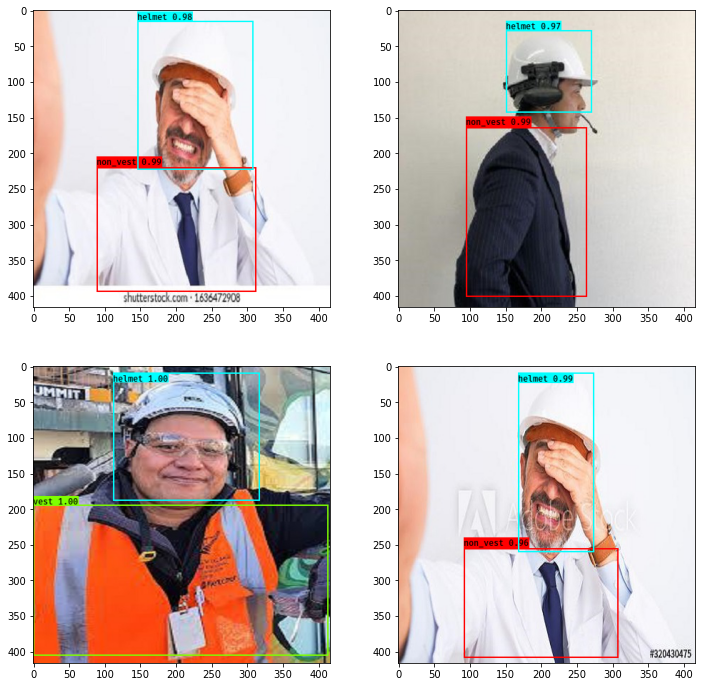

In [140]:
import glob
test2_img = 'C:/SED/keras-yolo3/testdata/'
np.random.seed(58)

# 랜덤하게 4개의 이미지 파일만 선택.
# 랜덤 숫자 만을 이용하지 말고 아래와 같은 방법을 이용하면, 알아서 random하게 파일을 선택해준다. 
all_images = glob.glob(test2_img + '/*.jpg')
all_images = np.array(all_images)
file_cnt = all_images.shape[0]
show_cnt = 4
show_indexes = np.random.choice(file_cnt, show_cnt)
show_files = all_images[show_indexes]
print(show_files)

# 4개의 
fig, axs = plt.subplots(figsize=(12,12) , ncols=2 , nrows=2)
for i , filename in enumerate(show_files):
    row = int(i/2)
    col = i%2
    img = Image.open(os.path.join(Image_Dir, filename))
    detected_img, label_dict = helmetvest.detect_image(img)
    axs[row][col].imshow(detected_img)

In [143]:
# test 데이터 정확도
# 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

print(183 / 224)

0.8169642857142857
